In [1]:
%reload_ext autoreload
%autoreload 2


In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import os

# Fit only one SED

In [3]:
from pyGRBz.pyGRBz import GRB_photoZ

In [4]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/SED/',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [5]:
# Load the GRB SED stored in data/sed/
photoz.load_data(data_dir='/data/sed/',data_name=['GRB050904'])


Observations:
    Name   time_since_burst band  flux flux_err  zp flux_unit detection telescope
--------- ---------------- ---- ----- -------- --- --------- --------- ---------
GRB050904            1.155   Ks 19.26     0.07   -        AB         1     isaac
GRB050904            1.155    H 19.74     0.07   -        AB         1     isaac
GRB050904            1.155    J 20.14     0.06   -        AB         1     isaac
GRB050904            1.155    z 21.03     0.22   -        AB         1     fors2
GRB050904            1.155    I 22.27     0.22   -        AB         1     cafos
GRB050904            1.155    I  24.2      0.2   -        AB         1     fors2
GRB050904            1.155    R 24.29     0.05   -        AB         0     cafos
GRB050904            1.155    V 24.23     0.05   -        AB         0     laica


Info about data:
    name   type  RA_J2000   DEC_J2000   ... beta_inf beta_X beta_X_sup beta_X_inf
--------- ---- ---------- ------------ ... -------- ------ ---------- ---

In [6]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
    Name   time_since_burst band ...     flux_corr         flux_corr_err   
                                ...      microJy             microJy      
--------- ---------------- ---- ... ------------------ -------------------
GRB050904            1.155    V ... 0.7379042301291044 0.18434138332737574
GRB050904            1.155    R ... 0.6982324040771732  0.1793175688589099
GRB050904            1.155    I ... 0.7585775750291881 0.37381165483615203
GRB050904            1.155    I ...  4.487453899331295  0.9535625369951598
GRB050904            1.155    z ...  14.06047524129924  1.6879095890510307
GRB050904            1.155    J ...  31.91537855100745  1.3280470614144213
GRB050904            1.155    H ...  46.13175745603771   1.724593957107847
GRB050904            1.155   Ks ...  71.77942912713644   2.151230070859339



<IPython.core.display.Javascript object>


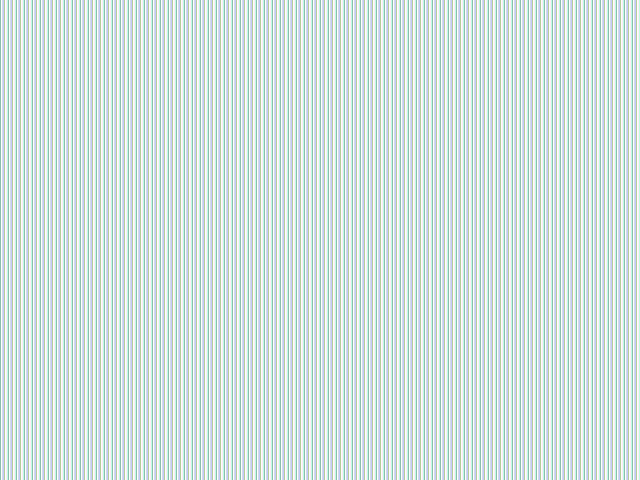


SEDS:
    Name   time_since_burst band  flux flux_err flux_unit
--------- ---------------- ---- ----- -------- ---------
GRB050904            1.155    V 24.23     0.05        AB
GRB050904            1.155    R 24.29     0.05        AB
GRB050904            1.155    I  24.2      0.2        AB
GRB050904            1.155    I 22.27     0.22        AB
GRB050904            1.155    z 21.03     0.22        AB
GRB050904            1.155    J 20.14     0.06        AB
GRB050904            1.155    H 19.74     0.07        AB
GRB050904            1.155   Ks 19.26     0.07        AB



In [7]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [8]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0.5,20])



Fit 1/1 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7967 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.75.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 6.29   Av_lit: -99.00


  3%|▎         | 13/400 [00:00<00:03, 121.92it/s]

Running burn-in


  1%|          | 12/1500 [00:00<00:12, 116.21it/s]

Running production
Nsteps1 > 0 --> Initial values are drawn from a Gaussian distribution with means equal to the values returning the best chi2 during first run and std of 1.00e-02


100%|██████████| 1500/1500 [00:12<00:00, 123.04it/s]

Mean acceptance fraction: 0.132

Best fit:
z: 6.560  Av: 0.031  beta: 1.397  Norm: 1.104     chi2: 5.577

Mean Proba: 1.27e-02
Sum Proba: 4.20e+02

68% - 1 sigma:
z: 6.418 +0.145 -0.167
Av: 0.239 +0.152 -0.158
Beta: 0.786 +0.462 -0.407
norm: 2.233 +1.412 -0.933

95% - 2 sigma:
z: 6.418 +0.242 -0.279
Av: 0.239 +0.244 -0.224
Beta: 0.786 +0.689 -0.654
norm: 2.233 +2.587 -1.200

99% - 3 sigma:
z: 6.418 +0.331 -0.349
Av: 0.239 +0.290 -0.237
Beta: 0.786 +0.817 -0.775
norm: 2.233 +3.242 -1.261


<IPython.core.display.Javascript object>


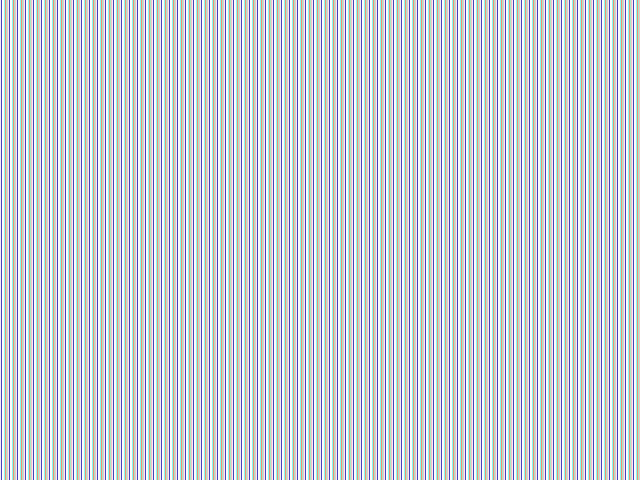

<IPython.core.display.Javascript object>


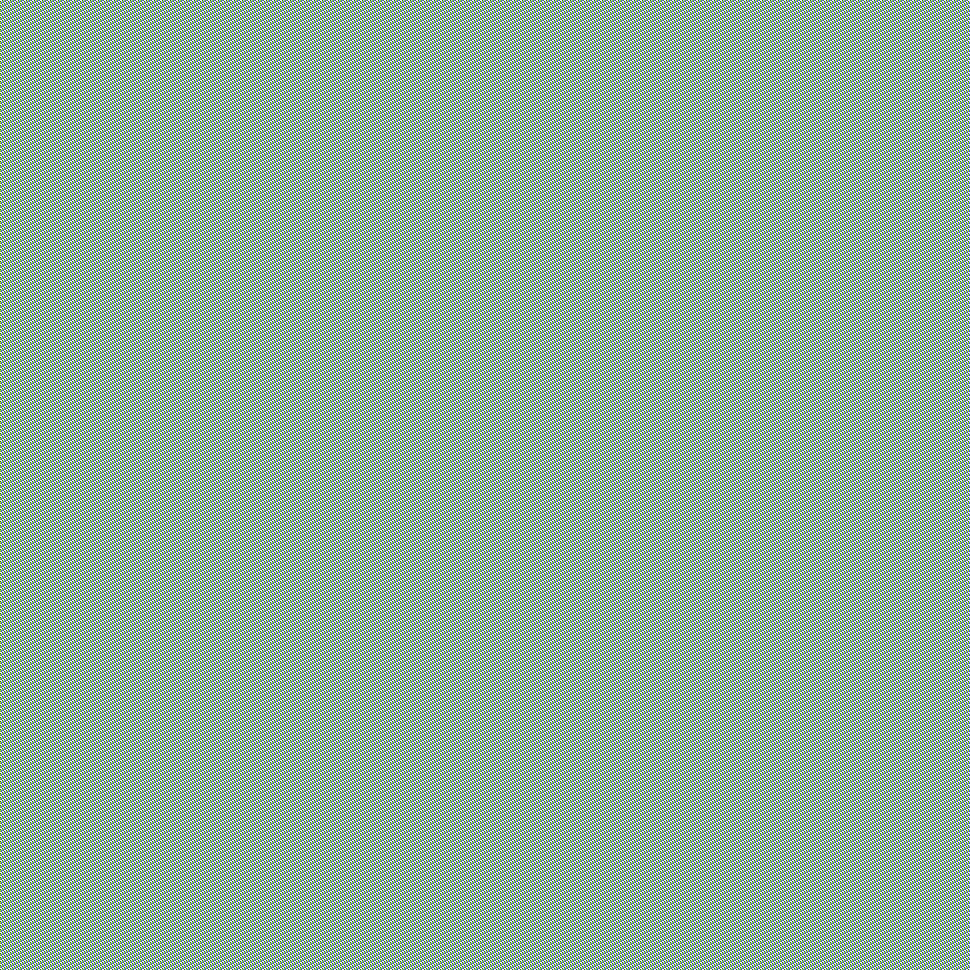


For best SED plot:
- Median values PDF: 6.418 0.239 0.786 2.233
- Best fit: 6.560 0.031 1.397 1.104


<IPython.core.display.Javascript object>


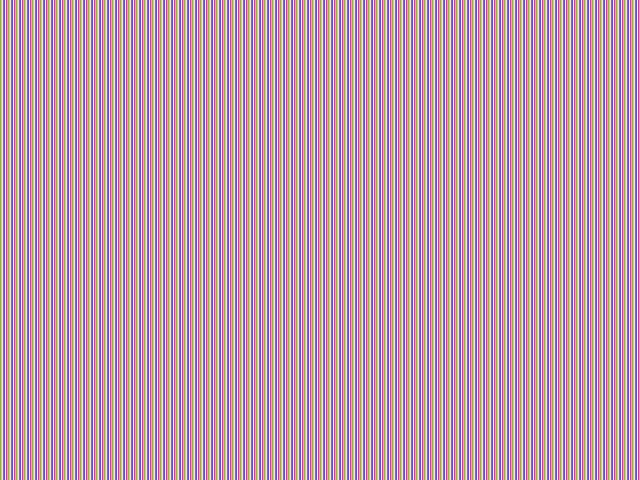


List of GRB not detected: []

None


In [11]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase, values returning the best chi2
# are used as initial values for production run. Set to 0 if you do not want this 
# Nsteps2: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

photoz.fit(
    ext_law='smc',
    Nthreads=6,
    nwalkers=30,
    Nsteps1=400,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=True

)


# Fit only one Light Curve

In [12]:
from pyGRBz.pyGRBz import GRB_photoZ

In [13]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/LC/',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [14]:
# Load the same GRB but with its light curve stored in data/lc/
photoz.load_data(data_dir='/data/lc/',data_name=['GRB_lc_test'])


Observations:
  Name time_since_burst band   flux  flux_err  zp flux_unit detection telescope
----- ---------------- ---- ------- -------- --- --------- --------- ---------
GRB_0             60.0  gri  9.9628     0.04   -        AB         1   colibri
GRB_0             60.0   zy   9.519     0.04   -        AB         1   colibri
GRB_0             60.0    J  9.1986     0.06   -        AB         1   colibri
GRB_0             95.0    g 10.6559     0.04   -        AB         1   colibri
GRB_0             95.0    z 10.0861     0.04   -        AB         1   colibri
GRB_0             95.0    J  9.8171     0.06   -        AB         1   colibri
GRB_0            130.0    r 10.7492     0.04   -        AB         1   colibri
GRB_0            130.0    y   10.38     0.04   -        AB         1   colibri
GRB_0            130.0    H  9.8178     0.06   -        AB         1   colibri
GRB_0            165.0    i 10.7762     0.04   -        AB         1   colibri
  ...              ...  ...     ... 

In [15]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


SEDS formatted:
  Name time_since_burst band ... ext_mag     flux_corr        flux_corr_err   
                            ...              microJy            microJy      
----- ---------------- ---- ... ------- ------------------ ------------------
GRB_0             95.0    g ...     0.0 198444.92645995907 3968.8985291991817
GRB_0            305.0    g ...     0.0 53171.633182132675 1063.4326636426536
GRB_0            200.0    g ...     0.0  87772.80953781646 1755.4561907563293
GRB_0             60.0  gri ...     0.0 375733.57092167425  7514.671418433485
GRB_0            340.0    r ...     0.0 61824.412774084114 1236.4882554816822
GRB_0            130.0    r ...     0.0  182104.2157844837  3642.084315689674
GRB_0            235.0    r ...     0.0  92112.80339852799 1842.2560679705598
GRB_0            165.0    i ...     0.0  177631.5068736855   3552.63013747371
GRB_0            270.0    i ...     0.0  98919.06438898768 1978.3812877797536
GRB_0             95.0    z ...     0.0  33539

<IPython.core.display.Javascript object>


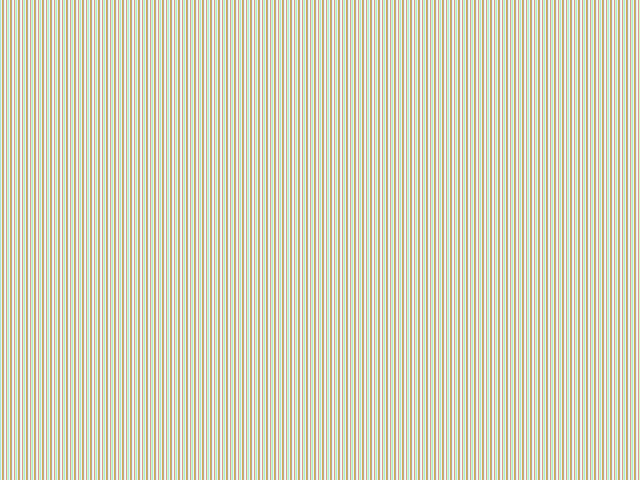

reddest band: H


<IPython.core.display.Javascript object>


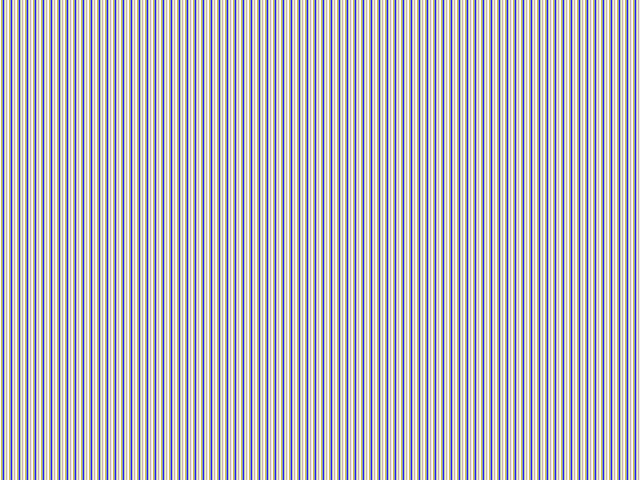


SEDS:
  Name time_since_burst band        flux              flux_err       flux_unit
             s                                                               
----- ---------------- ---- ------------------ -------------------- ---------
GRB_0            130.0    g  11.03722371334144 0.030852033976909412        AB
GRB_0            130.0    r 10.749199999999995 0.021714724095162587        AB
GRB_0            130.0    i 10.468510026979231 0.016356046117790266        AB
GRB_0            130.0    z  10.45652395557439  0.03054385841282776        AB
GRB_0            130.0    y 10.380000000000003  0.02171472409516259        AB
GRB_0            130.0    J  10.12186498694502   0.0287514869671561        AB
GRB_0            130.0    H  9.817799999999998 0.021714724095162587        AB



In [16]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [17]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/1 	 Object: GRB_0 

Bluest band detection: colibri/g with eff_wvl=4819 and bandwidth=1550 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 5.13.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 0.27   Av_lit: 0.24


  1%|          | 14/1500 [00:00<00:10, 135.68it/s]

Running production


100%|██████████| 1500/1500 [00:11<00:00, 127.54it/s]

Mean acceptance fraction: 0.120

Best fit:
z: 2.788  Av: 0.005  beta: 0.836  Norm: 0.982     chi2: 30.690

Mean Proba: 3.51e-08
Sum Proba: 1.16e-03

68% - 1 sigma:
z: 1.550 +0.831 -0.636
Av: 0.104 +0.080 -0.068
Beta: 0.694 +0.102 -0.112
norm: 1.035 +0.041 -0.037

95% - 2 sigma:
z: 1.550 +1.323 -1.471
Av: 0.104 +0.172 -0.099
Beta: 0.694 +0.170 -0.220
norm: 1.035 +0.078 -0.061

99% - 3 sigma:
z: 1.550 +1.453 -1.544
Av: 0.104 +0.229 -0.104
Beta: 0.694 +0.196 -0.337
norm: 1.035 +0.123 -0.083


<IPython.core.display.Javascript object>


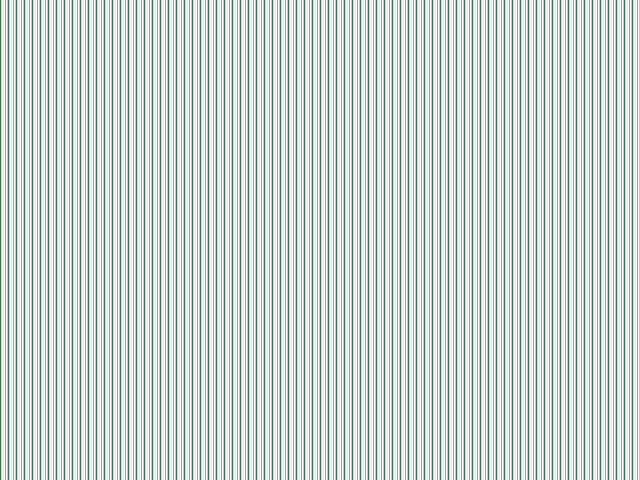

<IPython.core.display.Javascript object>


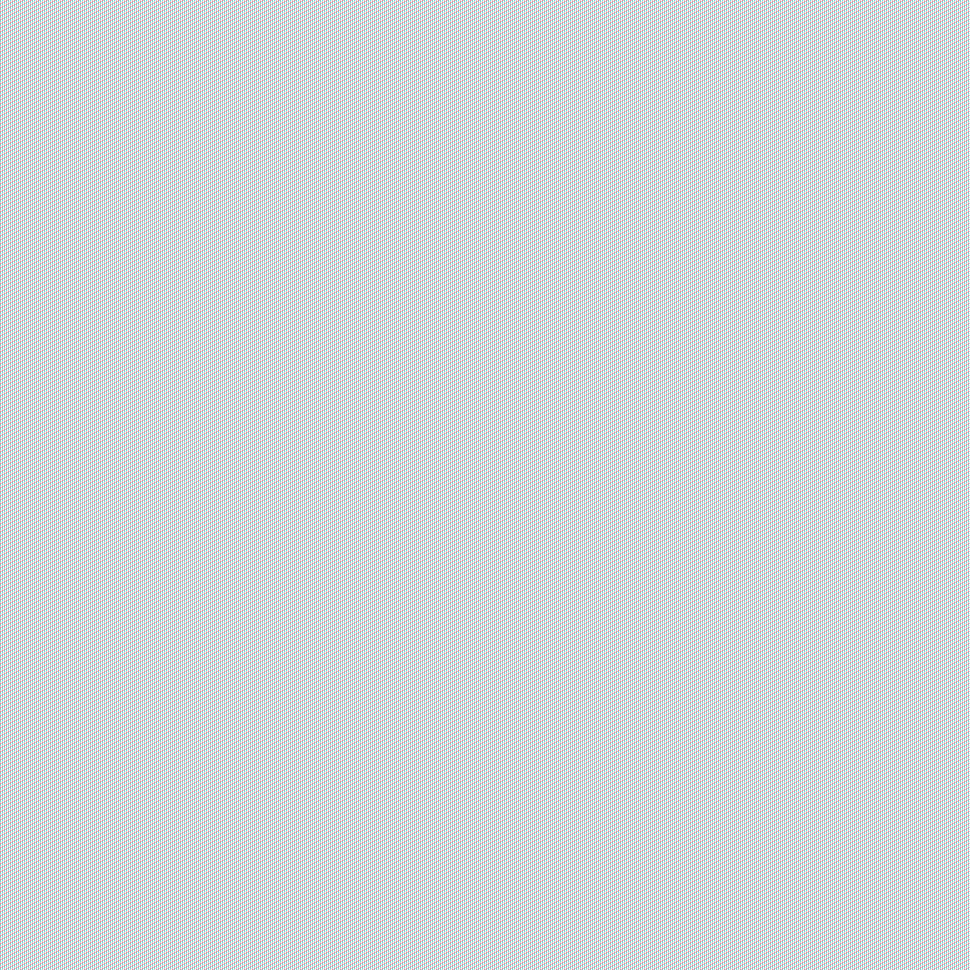


For best SED plot:
- Median values PDF: 1.550 0.104 0.694 1.035
- Best fit: 2.788 0.005 0.836 0.982


<IPython.core.display.Javascript object>


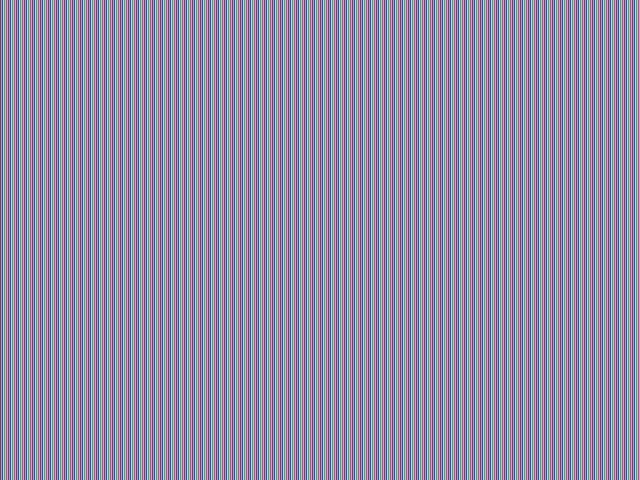


List of GRB not detected: []

None


In [19]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(
    ext_law='smc',
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=True
)

# Run code for multiple Targets

In [20]:
from pyGRBz.pyGRBz import GRB_photoZ

In [27]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/Tuto/MultipleTargets/',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [28]:
# Load as many targets as you want. It can be a mix of SEDs and light curves
photoz.load_data(
    data_dir='/data/sed/',           
    data_name=['GRB050904','GRB080825B','GRB080906']
)

            #data_name=['GRB050904','GRB080825B','GRB080906','GRB080913','GRB080916C','GRB081228','GRB090423',
            #           'GRB090429B','GRB090516','GRB100518A','GRB110721A','GRB120712A','GRB120922A','GRB130215A',
            #           'GRB130327A','GRB130408A','GRB130514A','GRB130606A','GRB130907A','GRB130925A','GRB131117A',
            #           'GRB140419A','GRB140515A','GRB140518A','GRB140614A','GRB141109A','GRB150120B','GRB150910A',
            #           'GRB151027B','GRB160203A','GRB160327A','GRB160625B'])
            


Observations:
    Name    time_since_burst band  flux ... flux_unit detection telescope ABcorr
---------- ---------------- ---- ----- ... --------- --------- --------- ------
 GRB050904            1.155   Ks 19.26 ...        AB         1     isaac     --
 GRB050904            1.155    H 19.74 ...        AB         1     isaac     --
 GRB050904            1.155    J 20.14 ...        AB         1     isaac     --
 GRB050904            1.155    z 21.03 ...        AB         1     fors2     --
 GRB050904            1.155    I 22.27 ...        AB         1     cafos     --
 GRB050904            1.155    I  24.2 ...        AB         1     fors2     --
 GRB050904            1.155    R 24.29 ...        AB         0     cafos     --
 GRB050904            1.155    V 24.23 ...        AB         0     laica     --
GRB080825B          25920.0    g 22.45 ...        AB         1     grond  -99.0
GRB080825B          25920.0    r 19.91 ...        AB         1     grond  -99.0
GRB080825B          2592

In [29]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight ofGRB080825B: E(B-V) = 0.213

Galactic extinction in band grond g: 0.829 AB mag
Galactic extinction in band grond r: 0.575 AB mag
Galactic extinction in band grond i: 0.429 AB mag
Galactic extinction in band grond z: 0.319 AB mag
Galactic extinction in band grond J: 0.190 AB mag
Galactic extinction in band grond H: 0.120 AB mag
Galactic extinction in band grond K: 0.077 AB mag

Reddening along the line of sight ofGRB080906: E(B-V) = 0.248

Galactic extinction in band grond g: 0.966 AB mag
Galactic extinction in band grond r: 0.671 AB mag
Galactic extinction in band grond i: 0.501 AB mag
Galactic extinction in band grond z: 0.373 AB mag
Galactic extinction in band grond J: 0.221 AB mag
Galactic extinction in band grond H: 0.140 AB mag
Galactic extinction in band grond K: 0.090 AB mag

SEDS formatted:
    Name    time_since_burst band ...     flux_corr         flux_corr_err   
                                 ...      microJy             microJy      
-

<IPython.core.display.Javascript object>


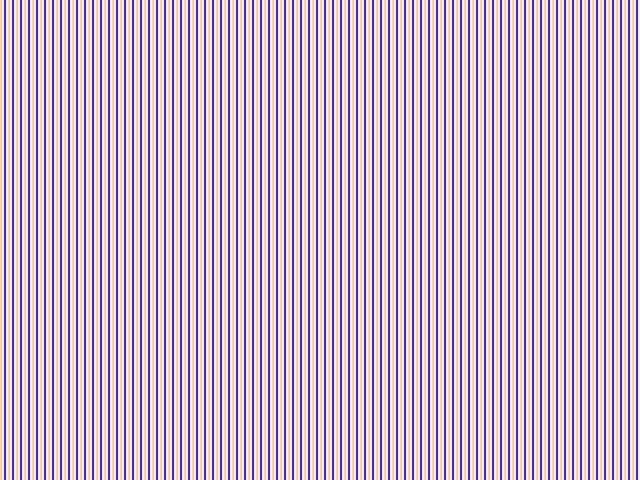

<IPython.core.display.Javascript object>


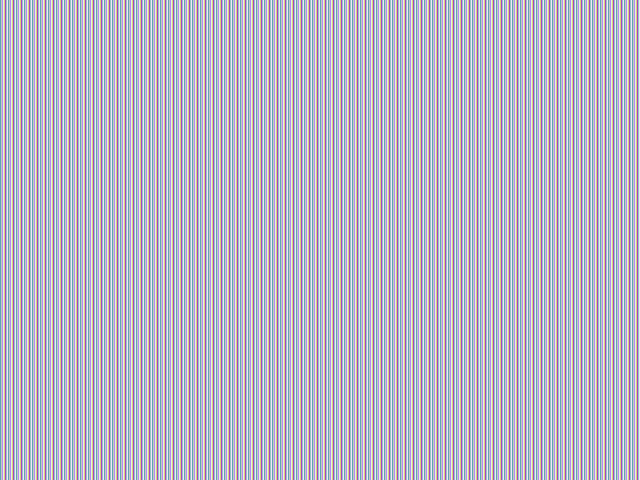

<IPython.core.display.Javascript object>


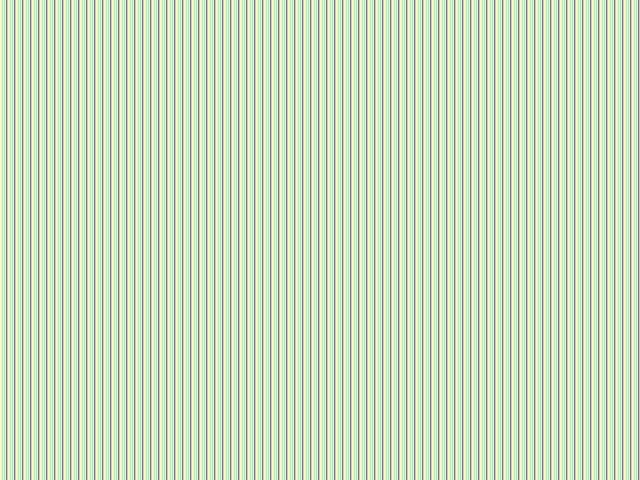


SEDS:
    Name    time_since_burst band        flux        flux_err flux_unit
---------- ---------------- ---- ------------------ -------- ---------
 GRB050904            1.155    V              24.23     0.05        AB
 GRB050904            1.155    R              24.29     0.05        AB
 GRB050904            1.155    I               24.2      0.2        AB
 GRB050904            1.155    I              22.27     0.22        AB
 GRB050904            1.155    z              21.03     0.22        AB
 GRB050904            1.155    J              20.14     0.06        AB
 GRB050904            1.155    H              19.74     0.07        AB
 GRB050904            1.155   Ks              19.26     0.07        AB
GRB080825B          25920.0    g              22.45     0.07        AB
GRB080825B          25920.0    r              19.91     0.04        AB
GRB080825B          25920.0    i              18.62     0.04        AB
GRB080825B          25920.0    z              18.24     0.04        A

In [30]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#a.extract_sed(model='BPL',method='fixed',time_SED=70)

In [25]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0,10])



Fit 1/3 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 6.29   Av_lit: -99.00


  1%|          | 12/1500 [00:00<00:13, 112.33it/s]

Running production


100%|██████████| 1500/1500 [00:13<00:00, 111.39it/s]

Mean acceptance fraction: 0.074

Best fit:
z: 6.531  Av: 0.022  beta: 1.429  Norm: 1.062     chi2: 5.193

Mean Proba: 1.12e-02
Sum Proba: 3.70e+02

68% - 1 sigma:
z: 6.332 +0.161 -0.170
Av: 0.316 +0.164 -0.197
Beta: 0.618 +0.542 -0.418
norm: 2.804 +1.638 -1.317

95% - 2 sigma:
z: 6.332 +0.281 -6.068
Av: 0.316 +4.661 -0.291
Beta: 0.618 +0.802 -0.588
norm: 2.804 +2.675 -1.722

99% - 3 sigma:
z: 6.332 +0.401 -6.271
Av: 0.316 +4.712 -0.312
Beta: 0.618 +0.960 -0.618
norm: 2.804 +4.877 -1.837


<IPython.core.display.Javascript object>


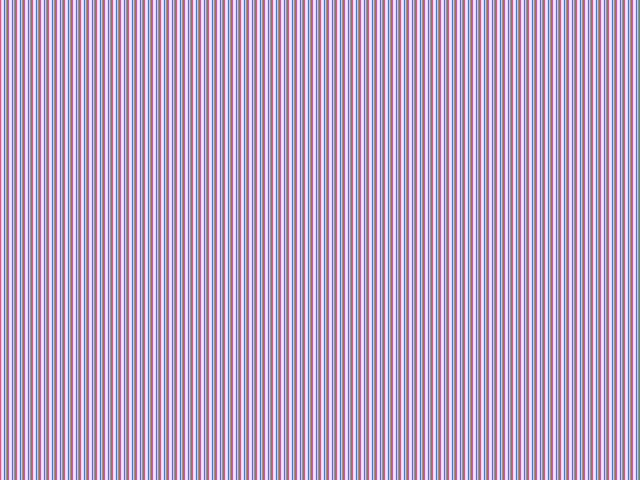

<IPython.core.display.Javascript object>


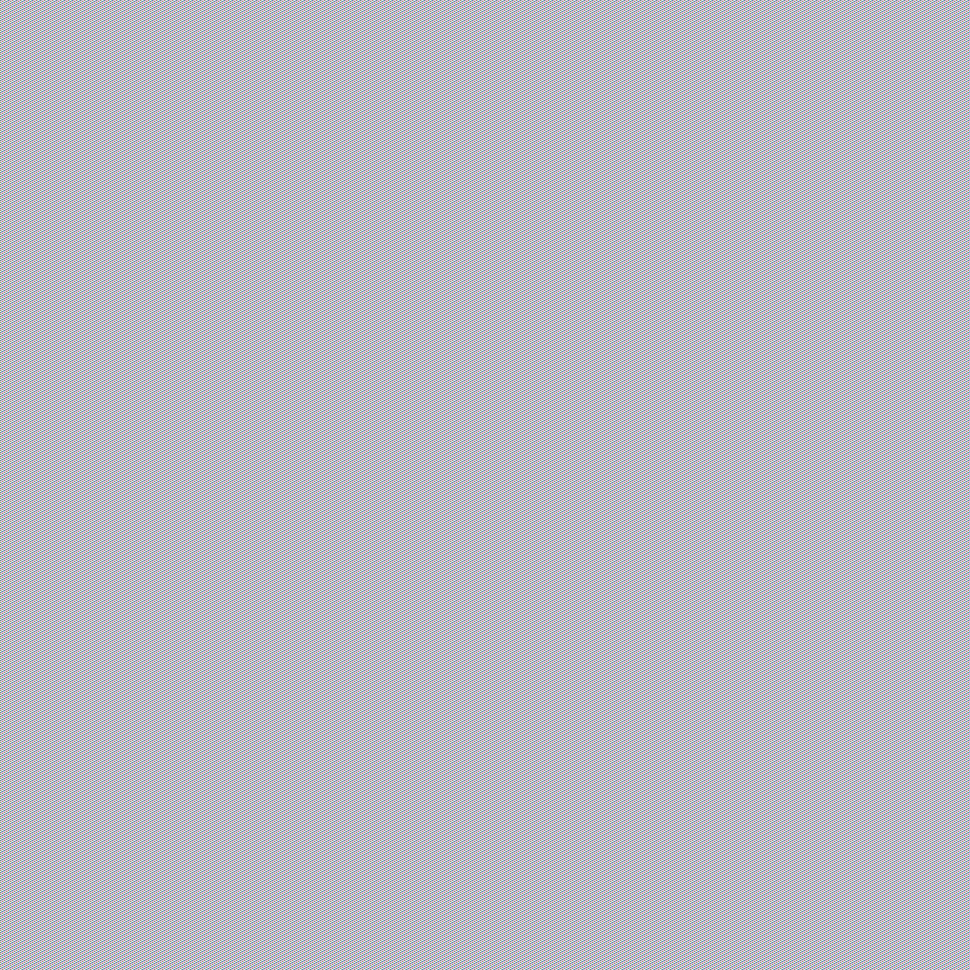


For best SED plot:
- Median values PDF: 6.332 0.316 0.618 2.804
- Best fit: 6.531 0.022 1.429 1.062


<IPython.core.display.Javascript object>


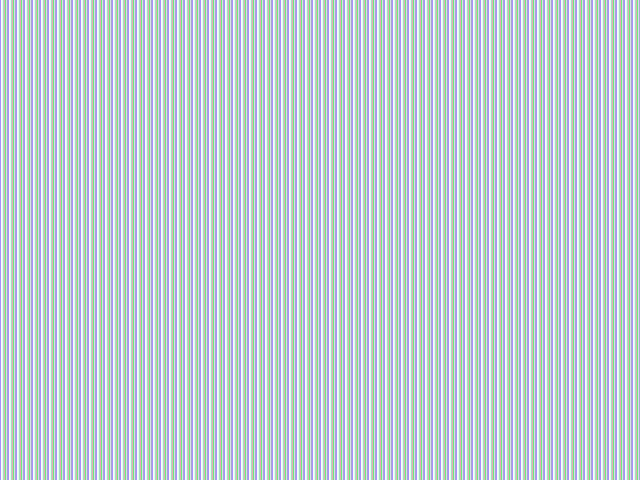



Fit 2/3 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 4.31   Av_lit: 0.20


  1%|          | 12/1500 [00:00<00:12, 116.81it/s]

Running production


100%|██████████| 1500/1500 [00:13<00:00, 113.67it/s]


Mean acceptance fraction: 0.154

Best fit:
z: 4.556  Av: 0.208  beta: 0.375  Norm: 1.305     chi2: 8.727

Mean Proba: 1.91e-03
Sum Proba: 6.32e+01

68% - 1 sigma:
z: 4.558 +0.034 -0.069
Av: 0.219 +0.092 -0.041
Beta: 0.340 +0.131 -0.238
norm: 1.322 +0.106 -0.061

95% - 2 sigma:
z: 4.558 +0.053 -4.422
Av: 0.219 +3.091 -0.079
Beta: 0.340 +0.246 -0.339
norm: 1.322 +0.889 -0.118

99% - 3 sigma:
z: 4.558 +0.082 -4.539
Av: 0.219 +3.420 -0.113
Beta: 0.340 +0.354 -0.340
norm: 1.322 +1.591 -0.165


<IPython.core.display.Javascript object>


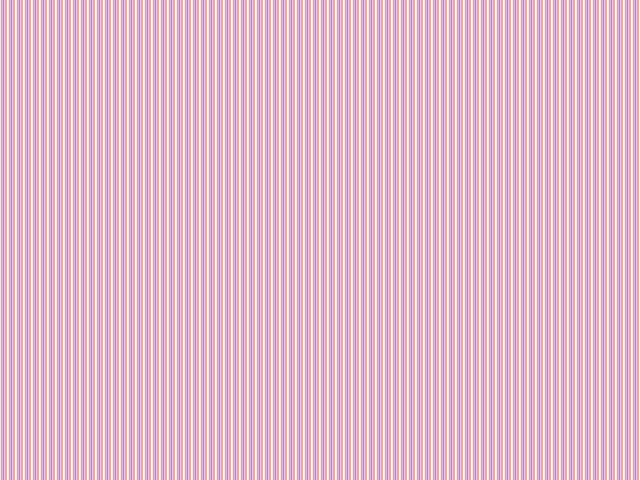

<IPython.core.display.Javascript object>


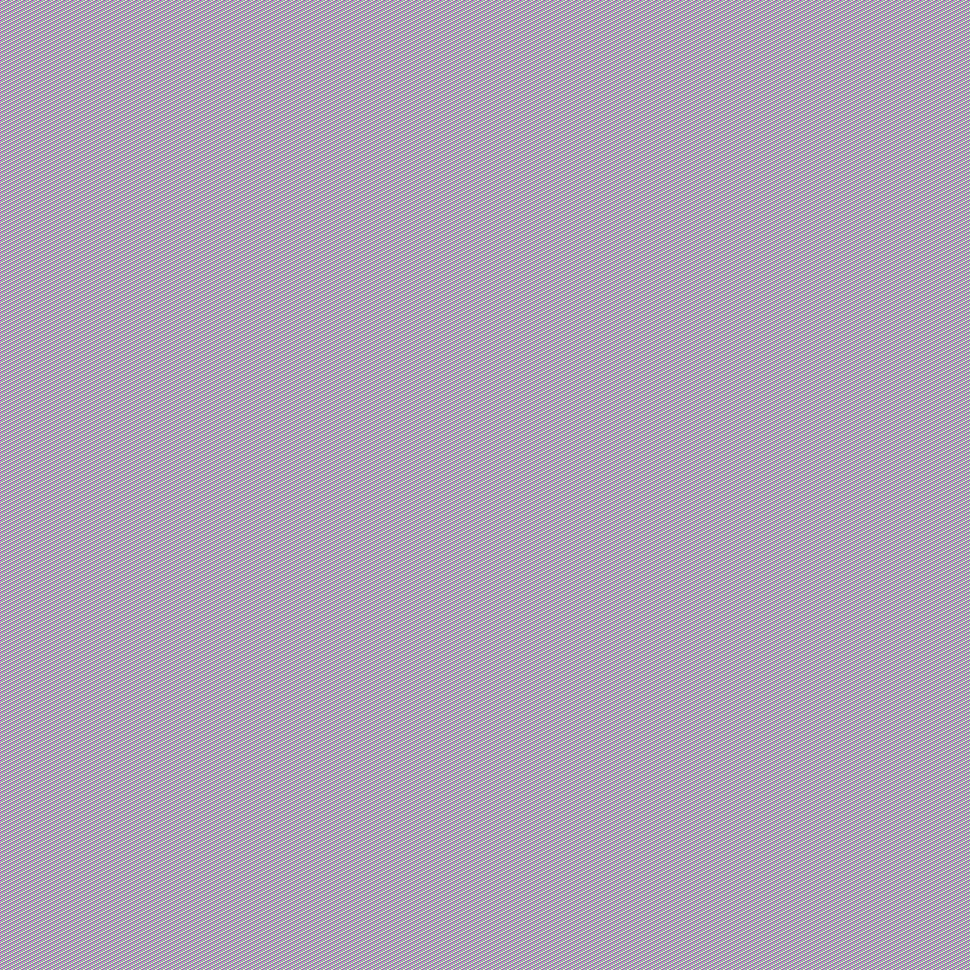


For best SED plot:
- Median values PDF: 4.558 0.219 0.340 1.322
- Best fit: 4.556 0.208 0.375 1.305


<IPython.core.display.Javascript object>


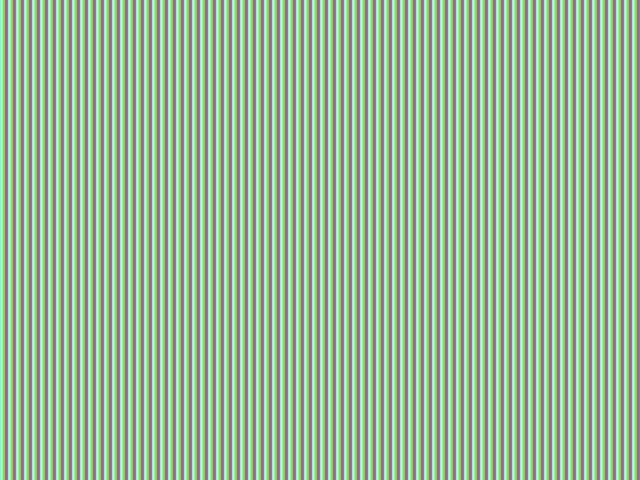



Fit 3/3 	 Object: GRB080906 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: 2.13   Av_lit: 0.15


  1%|          | 12/1500 [00:00<00:13, 113.27it/s]

Running production


100%|██████████| 1500/1500 [00:12<00:00, 118.50it/s]

Mean acceptance fraction: 0.195

Best fit:
z: 0.479  Av: 0.002  beta: 0.315  Norm: 0.884     chi2: 2.136

Mean Proba: 1.17e-01
Sum Proba: 3.86e+03

68% - 1 sigma:
z: 0.915 +0.884 -0.662
Av: 0.068 +0.086 -0.048
Beta: 0.208 +0.094 -0.112
norm: 0.879 +0.065 -0.056

95% - 2 sigma:
z: 0.915 +1.575 -0.874
Av: 0.068 +0.196 -0.065
Beta: 0.208 +0.184 -0.189
norm: 0.879 +0.127 -0.110

99% - 3 sigma:
z: 0.915 +1.987 -0.911
Av: 0.068 +0.316 -0.068
Beta: 0.208 +0.261 -0.206
norm: 0.879 +0.202 -0.175


<IPython.core.display.Javascript object>


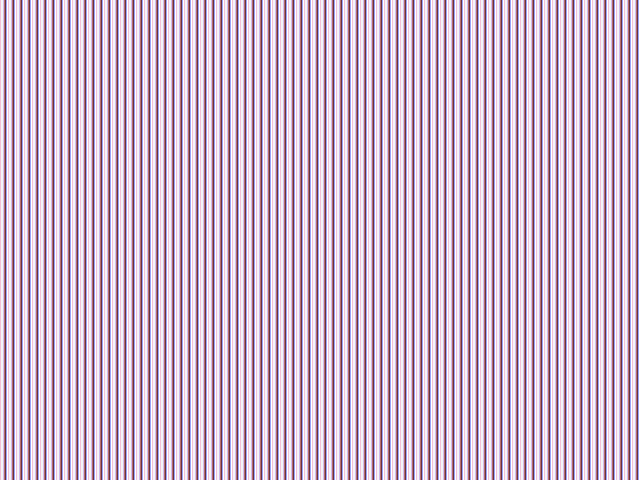

<IPython.core.display.Javascript object>


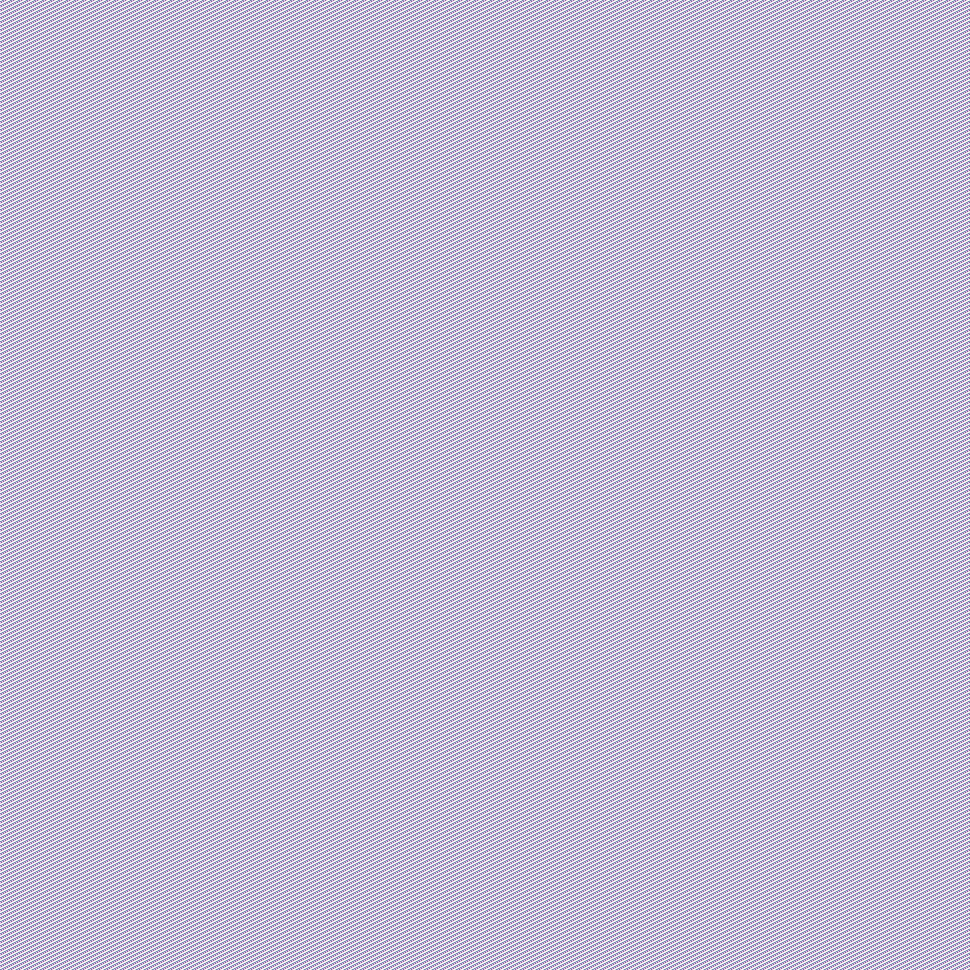


For best SED plot:
- Median values PDF: 0.915 0.068 0.208 0.879
- Best fit: 0.479 0.002 0.315 0.884


<IPython.core.display.Javascript object>


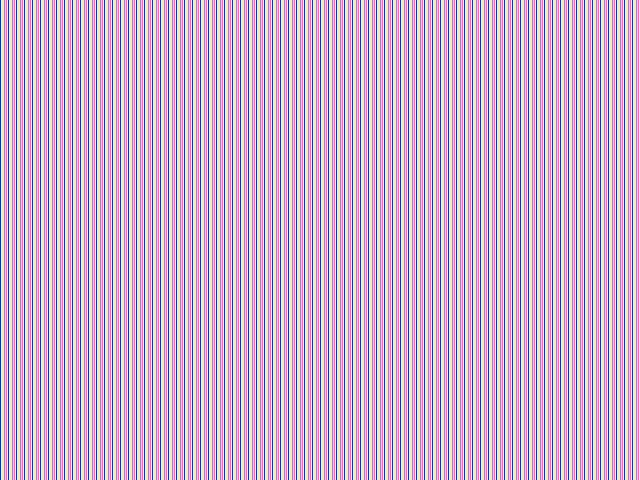


List of GRB not detected: []

None


In [26]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase
# Nsteps2: number of steps for the second burn-in phase
# Nsteps3: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'


photoz.fit(
    ext_law='smc',
    Nthreads=6,
    nwalkers=30,
    Nsteps1=0,
    Nsteps2=1500,
    nburn=400,
    Host_dust=True,
    Host_gas=False,
    igm_att='Meiksin',
    clean_data=False,
    priors=priors,
    adapt_z=True
)

<IPython.core.display.Javascript object>


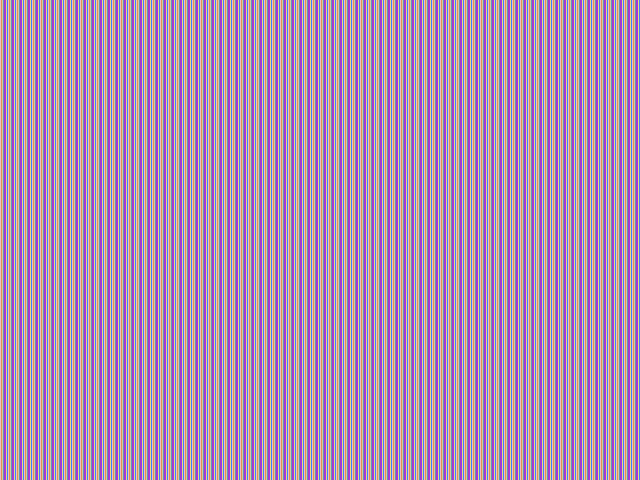

<IPython.core.display.Javascript object>


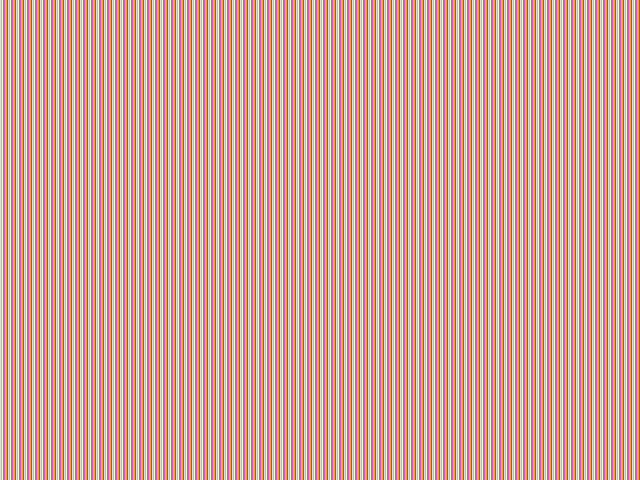

<IPython.core.display.Javascript object>


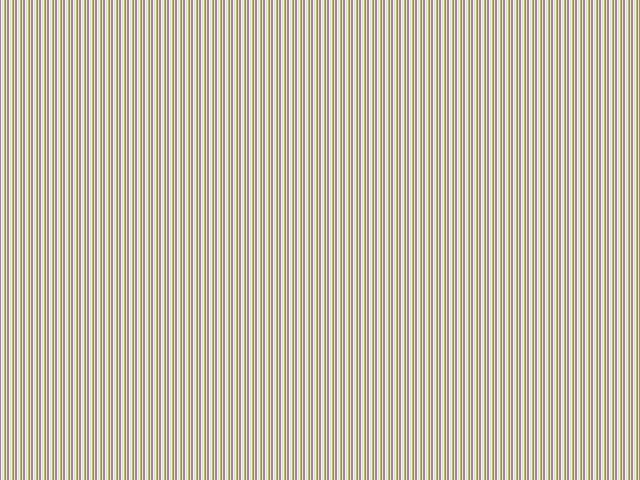

In [31]:
# Plot all redshift estimations together
photoz.plot_zsim_zphot(
    input_file='best_fits_all_smc',
    output_suffix='_smc_1sig',
    sigma=1,
    input_dir='/results/Tuto/MultipleTargets/',
    output_dir='/results/Tuto/MultipleTargets/'
)